None
[((2022, 1, 20), 14), ((2022, 1, 21), 12), ((2022, 1, 23), 13), ((2022, 1, 24), 15), ((2022, 2, 20), 13), ((2022, 2, 24), 15), ((2022, 2, 28), 15)]


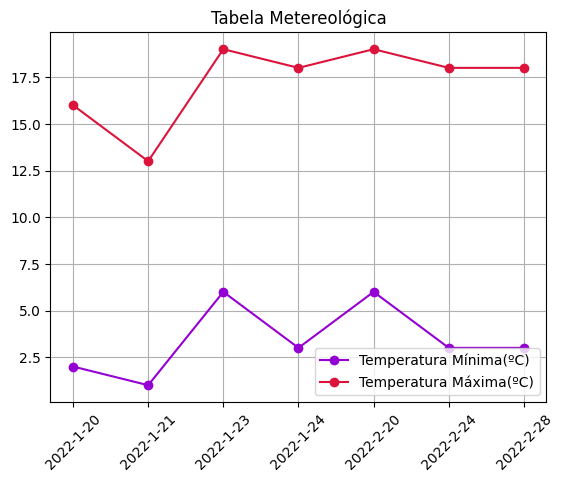

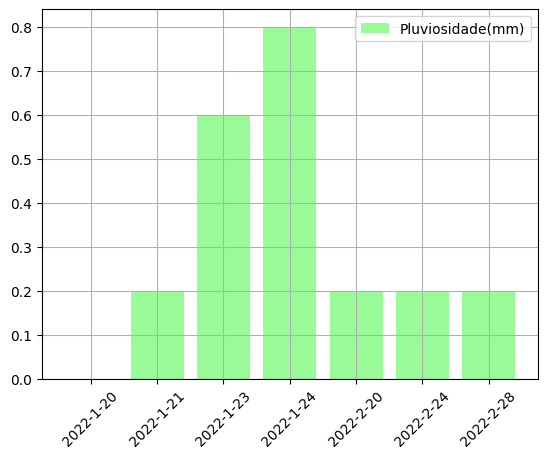

None
1
Saiu

====menu====
1  - Fazer média tabMeteo (forma1) 
2  - Fazer média tabMeteo (forma2)
3  - Guardar tabMeteo
4  - Carregar tabMeteo
5  - Temp min mais baixa registada na tabMeteo
6  - Amplitude térmica de cada dia na tabMeteo
7  - Máximo de chuva registada na tabMeteo
8  - quando prec foi > p na tabMeteo
9  - Máximo consecutivo de dias com prec < p na tabMeteo
10 - Gráficos da temperatura mínima, máxima e de pluviosidade da tabMeteo
0 - Sair
None


In [2]:
# TabMeteo = [(Data,TempMin,TempMax,Precipitacao)]  
    # Data = (Int,Int,Int)
    # TempMin = Float
    # TempMax = Float
    # Precipitacao = Float

tabMeteo1 = [((2022,1,20), 2, 16, 0),((2022,1,21), 1, 13, 0.2), ((2022,1,22), 7, 17, 0.01)]




def medias(tabMeteo):
    res = []
    for dia in tabMeteo:
        tmin= dia[1]
        tmax= dia[2]
        data=dia[0]
        media=(tmin + tmax)/2
        tuplo=(data,media)
        res.append(tuplo)
    return res




def media_2(tabMeteo):
    res=[]
    for data, tmin, tmax, prec in tabMeteo:
        media= (tmin + tmax)/ 2
        res.append(data,media)
    return res




def guardaTabMeteo(t, fnome): #fazer sempre open close, para não esquecer de o fazer no fim
    file= open(fnome,"w") 
    for data,tmin,tmax,prec in t:
        ano,mes,dia = data
        file.write(f"{ano}-{mes}-{dia};{tmin};{tmax};{prec}\n")
    file.close()
    return

guardaTabMeteo(tabMeteo1, "meteorologia.txt")




def carregaTabMeteo(fnome):
    res = []
    file=open(fnome,"r")
    for line in file:
        # line= line[:-1]
        line=line.strip()
        campos= line.split(";")
        data,tmin,tmax,prec=campos 
        ano,mes,dia= data.split("-")
        tuplo= (data,float(tmin),float(tmax),float(prec))
        res.append(tuplo)
    file.close()
    return res

tabMeteo2 = carregaTabMeteo("meteorologia.txt")
tabMeteo2




def minMin(tabMeteo):
    min_temp= tabMeteo [0][1]  #começamos com a 1ª tmín
    for dia in tabMeteo:
        tmin= dia[1]
        if tmin < min_temp:
            min_temp = tmin
    
    return min_temp




def amplTerm(tabMeteo):
    res = []
    for dia in tabMeteo:
        tmin= dia[1]
        tmax= dia[2]
        data= dia[0]
        ampl= tmax -tmin 
        tuplo= ((data,ampl))
        res.append(tuplo)
    return res 




def maxChuva(tabMeteo):
    max_prec= tabMeteo [0][3]  #começamos com a 1ª prec máx
    for dia in tabMeteo:
        pmax = dia[3]
        data=dia[0]
        if pmax > max_prec:
            max_prec = pmax
    return (data, max_prec)


tabMeteo3 = [((2022,1,20), 2, 16, 0), ((2022,1,21), 1, 13, 0.2), ((2022,1,23), 6, 19, 0.6), ((2022,1,24), 3, 18, 0.8),((2022,2,20), 6, 19, 0.2), ((2022,2,24), 3, 18, 0.2), ((2022,2,28), 3, 18, 0.2)]

def diasChuvosos (tabMeteo3, p):
    res=[]     # lista de pares que guarda [(data,prec)]
    for dia in tabMeteo3:
        prec= dia[3] 
        data= dia[0]
        p=0.5
        if prec > p:
           res.append((data,prec)) 
    
    return res




def maxPeriodoCalor(tabMeteo3, p): #calcular o comp max de uma sequência contínua de dias em que prec < p
    max_conscut= 0
    a= 0
    for dia in tabMeteo3:
        prec= dia[3]
        p = 0.2
        if prec < p:
           a+=1
           if a > max_conscut:
               max_conscut = a
        else:
            a=0  #qd chove o necessário reinicia
        
    return max_conscut





from matplotlib import pyplot as plt
def grafTabMeteo(t):  #desenhar graficos
    x=[f"{data[0]}-{data[1]}-{data[2]}" for data,tmin,tmax,prec in t]
    ytmin= [tmin for data,tmin,tmax,prec in t]
    ytmax= [tmax for data,tmin,tmax,prec in t]
    
    y_prec= [prec for*_, prec in t]

    plt.plot(x,ytmin,label= "Temperatura Mínima(ºC)",color= "darkviolet", marker= "o")
    plt.plot(x,ytmax,label= "Temperatura Máxima(ºC)",color= "crimson", marker= "o")
    plt.legend()
    plt.title("Tabela Metereológica")
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    plt.bar(x,y_prec,label= "Pluviosidade(mm)", color="palegreen")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    return

tabMeteo3 = [((2022,1,20), 2, 16, 0), ((2022,1,21), 1, 13, 0.2), ((2022,1,23), 6, 19, 0.6), ((2022,1,24), 3, 18, 0.8),((2022,2,20), 6, 19, 0.2), ((2022,2,24), 3, 18, 0.2), ((2022,2,28), 3, 18, 0.2)]





def menu():
    print("\n====menu====")
    print("1  - Fazer média tabMeteo (forma1) ")
    print("2  - Fazer média tabMeteo (forma2)")
    print("3  - Guardar tabMeteo")
    print("4  - Carregar tabMeteo")
    print("5  - Temp min mais baixa registada na tabMeteo")
    print("6  - Amplitude térmica de cada dia na tabMeteo")
    print("7  - Máximo de chuva registada na tabMeteo")
    print("8  - quando prec foi > p na tabMeteo")
    print("9  - Máximo consecutivo de dias com prec < p na tabMeteo")
    print("10 - Gráficos da temperatura mínima, máxima e de pluviosidade da tabMeteo")
    print("0 - Sair")
    print("=============")

modo=-1

while modo!=0:
    modo=int(input("O que pretende fazer?"))
    if modo==0:
        print("Saiu")
    elif modo==1:
        print(medias(tabMeteo3))
    elif modo==2:
        print(media_2(tabMeteo3))
    elif modo==3:
        fnome=input("Digite o nome do ficheiro")
        print(guardaTabMeteo(tabMeteo3, fnome))
    elif modo==4:
        fnome=input("Digite o nome do ficheiro")
        print(carregaTabMeteo(fnome))
    elif modo==5:
        print(minMin(tabMeteo3))  
    elif modo==6:
        print(amplTerm(tabMeteo3))
    elif modo==7:
        print(maxChuva(tabMeteo3))
    elif modo==8:
        p =float(input("Diga o valor da precipitação:"))
        print(diasChuvosos (tabMeteo3, p))
    elif modo==9:
        p =float(input("Diga o valor da precipitação:"))
        print(maxPeriodoCalor(tabMeteo3, p))
    elif modo==10:
        print(grafTabMeteo(tabMeteo3))

    else:
        print("Tente outra vez")

print(menu())
    